<a href="https://colab.research.google.com/github/Alekhyo/Regression/blob/master/logisticmodel_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [ ]:
data=pd.read_csv('dataset.txt')

In [ ]:
data

,Marks_1,Marks_2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
X=data.iloc[:,0:-1].values
y=data.iloc[:,-1].values

## Visualising Data

In [ ]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.   
    """ 
    pos = y == 1
    neg = y == 0
    
    plt.plot(X[pos, 0], X[pos, 1], 'k*')
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', mec='k')

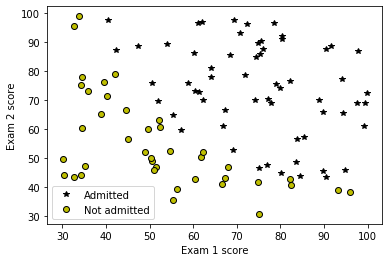

In [ ]:
plotData(X, y)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

plt.show()

In [ ]:
# Add intercept term to X
X=np.hstack((np.ones((X.shape[0],1)),X))
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

## LOGISTIC REGRESSION

In [ ]:
class logistic_regression():
    def __init__(self,alpha=0.001,iterations=100000):
        self._theta=0
        self._grad=0
        self._alpha=0.001 # Learning Rate
        self._iters=100000 # Iterations
        self._J=0
    
    def _sigmoid(self,z):
        """
        Compute sigmoid function given the input z.
        """
    
        z=np.array(z)
        return 1 / (1 + np.exp(-z))


    def _hx(self,theta,X):
        """
            Compute Transpose Matrix
    
        """
        return np.dot(X,self._theta)
    
    def _sigmoid_hx(self,theta,X):
        """
    
            Passing the input matrix to a sigmoid function
    
        """
        return self._sigmoid(hx(self._theta,X))
    
    
    def fit(self,X, y):
        """
            Compute cost and gradient for logistic regression. 
    
        """ 

        m = y.size #Training Size
    
        self._theta = np.zeros(n+1)  #Initialising Theta
        self._grad = np.zeros(theta.shape) #Initialising gradient

        for i in range(0,self._iters):
            self._J=(-1/(y.size))*(np.sum(y*np.log(self._sigmoid_hx(self._theta,X))+(1-y)*np.log(1-self._sigmoid_hx(self._theta,X))))
    
            self._grad=(1 / m) * np.dot(X.T,self._sigmoid(hx(self._theta,X)) - y)
        
            self._theta=self._theta-(self._alpha)*self._grad
        
    
    
    def predict(self,X):
        
        predict_probabilities=self._sigmoid_hx(self._theta,X)
    
        y_pred_labels=predict_probabilities>0.5
    
        return y_pred_labels
    
    
    def accuracy(self,y_predicted,y_test):
    
        y_predicted=np.where(y_predicted==True,1,y_predicted)
        
        accuracy=(y_predicted[y_predicted==y_test].size)/(y_predicted.size)*100
        
        return accuracy

    def get_gradient(self):
        """
         Public Method to return gradient value
        """
        return self._grad
    
    def get_cost(self):
        """
         Public Method to return Cost
        """
        return self._J
    
    def get_theta(self):
        """
         Public Method to return theta
        """
        return self._theta


In [ ]:
logReg=logistic_regression() # CREATE INSTANCE OF LOGISTIC REGRESSION 

In [ ]:
logReg.fit(X,y) # FIT THE MODEL

In [ ]:
y_out=logReg.predict(X)  # PREDICT THE OUTPUT

In [ ]:
print(log.accuracy(y_out,y))  # PRINT ACCURACY

91.0


## Visualising Decision Boundary

In [ ]:
def plotDecisionBoundary(plotData, theta, X, y):
    
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.
    """
    
    # make sure theta is a numpy array
    theta = np.array(theta)
    
    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)


    
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

    # Calculate the decision boundary line
    plot_y = ((-1) / theta[2]) * (theta[1] * plot_x + theta[0])

    # Plot, and adjust axes for better viewing
    plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
    plt.legend(['Admitted', 'Not Admitted', 'Decision Boundary'])


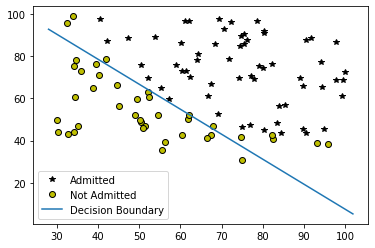

In [ ]:
plotDecisionBoundary(plotData,logReg.get_theta(),X,y)